## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Load Prepared Dataset](#load-prepared-dataset)
3. [Exclude Low-Activity Customers](#exclude-low-activity-customers)
4. [Inspect High-Activity Customer Dataset](#inspect-high-activity-customer-dataset)
5. [Analyze Orders by Department](#analyze-orders-by-department)
6. [Visualize Popular Departments](#visualize-popular-departments)
7. [Analyze Produce Department](#analyze-produce-department)
8. [Top Produce Items](#top-produce-items)
9. [Create Customer Age Groups](#create-customer-age-groups)
10. [Analyze Spending by Age Group](#analyze-spending-by-age-group)
11. [Order Frequency by Age Group](#order-frequency-by-age-group)
12. [Orders by Day of Week and Age](#orders-by-day-of-week-and-age)
13. [Orders by Hour of Day and Age](#orders-by-hour-of-day-and-age)
14. [Analyze Loyalty Status Distribution](#analyze-loyalty-status-distribution)
15. [Order Behavior by Loyalty Status](#order-behavior-by-loyalty-status)
16. [Ordering Habits by Region](#ordering-habits-by-region)
17. [Busiest Days of the Week](#busiest-days-of-the-week)
18. [Busiest Hours of the Day](#busiest-hours-of-the-day)
19. [Expenditure by Time of Day](#expenditure-by-time-of-day)
20. [Export Final Dataset](#export-final-dataset)
21. [Supplemental Visualizations](#supplemental-visualizations)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# 1. Importing data set

In [3]:
df = pd.read_pickle(r'C:\Users\rbaue\Desktop\Instacart\Prepared Data\ords_prods_cust2_merge.pkl')

In [4]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'busiest_days', 'most_orders',
       'busiest_hours', 'max_order', 'loyalty_flag', 'avg_price',
       'average_spend', 'spender_flag', 'med_dspo', 'order_regularity',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income'],
      dtype='object')

In [5]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spender_flag,med_dspo,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low_spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


In [6]:
# 2. Addressing PII data

I already dropped the first_name and last_name columns last exercise since the user-id column is sufficient for my analysis. I don't believe there's any other PII in the data

In [7]:
# 3. Creating a dictionary that maps each state to its region

In [8]:
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}

In [9]:
# Creating a region column 

In [10]:
df['region'] = df['state'].map(state_to_region)

In [11]:
# Checking my work

In [12]:
df[['state', 'region']]

,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
...,...,...
32404854,Rhode Island,Northeast
32404855,West Virginia,South
32404856,Michigan,Midwest
32404857,Michigan,Midwest


In [13]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,med_dspo,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest


In [14]:
# Determing if there's a difference between spending habits between the regions by creating a crosstab of the region column with the spender_flag column

In [15]:
crosstab_regional_spending = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [16]:
crosstab_regional_spending

spender_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Each region follows the same pattern of high percentage of Low Spenders vs High Spenders, so there's not much of a difference

In [17]:
# 4. 

In [18]:
## Creating an exclusion flag column for customers with less than 5 orders using the max_order column 

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high'

In [19]:
## Checking my work

df['customer_activity'].value_counts(dropna = False)

customer_activity
high    30964564
low      1440295
Name: count, dtype: int64

In [20]:
## Creating a new dataframe with only the low-activity customers

df_low_act_cust = df[df['customer_activity']=='low']

In [21]:
## Checking my work 

df_low_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Frequent customer,Male,Kansas,41,1/7/2018,2,married,122060,Midwest,low


In [22]:
## Checking the shape of the new dataframe 

df_low_act_cust.shape

(1440295, 34)

In [23]:
## Exporting the sample

path = r'C:\Users\rbaue\Desktop\Instacart'

df_low_act_cust.to_pickle(os.path.join(path, 'Prepared Data', 'low_activity_customers.pkl'))

In [24]:
# Excluding the low-activities customers per the CFO's request

In [25]:
## Checking the shape before excluding 

df.shape

(32404859, 34)

In [26]:
## Making a new dataframe with only high-activity customers

df_2 = df[df['customer_activity']== 'high']

In [27]:
## Checking the shape of this dataframe 

df_2.shape

(30964564, 34)

In [28]:
## Checking its head as well

df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Regular customer,Female,Hawaii,51,1/4/2019,2,married,57797,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,high


In [29]:
# steps 5-9

In [30]:
## Determining which departments are popular 

df_2['department_id'].value_counts()

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

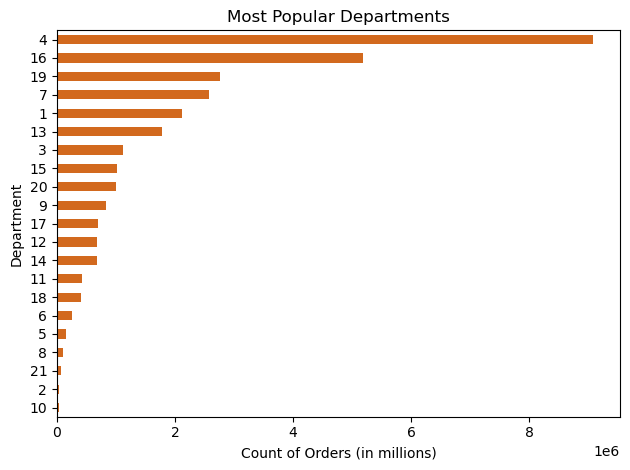

In [31]:
## Creating a bar chart of departments by order count 

bar_dept = df_2['department_id'].value_counts().sort_values().plot(kind = 'barh', color = ['chocolate'])

plt.title('Most Popular Departments')
plt.xlabel('Count of Orders (in millions)')
plt.ylabel('Department')

plt.tight_layout()

In [32]:
## Exporting bar chart
bar_dept.figure.savefig(os.path.join(path, 'Visualizations', 'bar_dept.png'),bbox_inches='tight')

In [33]:
## Creating a dataframe with produce only
df_produce_only = df_2[df_2['department_id'] == 4]

In [34]:
df_produce_only.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
10881,31,White Pearl Onions,123,4,7.5,2766690,2937,3,1,17,...,Regular customer,Male,Ohio,28,5/25/2018,3,married,88405,Midwest,high
10882,31,White Pearl Onions,123,4,7.5,2960023,4582,2,2,21,...,Frequent customer,Male,Tennessee,24,8/1/2019,1,married,64749,South,high
10883,31,White Pearl Onions,123,4,7.5,987065,4582,13,6,13,...,Frequent customer,Male,Tennessee,24,8/1/2019,1,married,64749,South,high
10884,31,White Pearl Onions,123,4,7.5,1062850,4705,65,4,13,...,Frequent customer,Female,Idaho,65,6/26/2017,0,divorced/widowed,63568,West,high
10885,31,White Pearl Onions,123,4,7.5,741886,8662,14,3,4,...,Frequent customer,Female,Tennessee,62,3/7/2017,2,married,87777,South,high
10886,31,White Pearl Onions,123,4,7.5,2991809,13354,9,1,18,...,Frequent customer,Female,Tennessee,42,5/18/2017,1,married,101077,South,high
10887,31,White Pearl Onions,123,4,7.5,1139341,13421,12,4,11,...,Regular customer,Female,Delaware,42,4/12/2017,3,married,151292,South,high
10888,31,White Pearl Onions,123,4,7.5,1754426,13851,35,0,19,...,Frequent customer,Female,Ohio,53,2/1/2017,2,married,142146,Midwest,high
10889,31,White Pearl Onions,123,4,7.5,1078035,21362,14,1,14,...,Non-frequent customer,Male,Texas,27,6/29/2017,1,married,60509,South,high
10890,31,White Pearl Onions,123,4,7.5,2711843,22909,44,5,8,...,Frequent customer,Male,Florida,35,10/12/2019,0,single,74929,South,high


In [35]:
## Finding top 10 produce items
top_produce_items = df_produce_only['product_name'].value_counts().head(10)

In [36]:
top_produce_items.head(10)

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Raspberries       132945
Name: count, dtype: int64

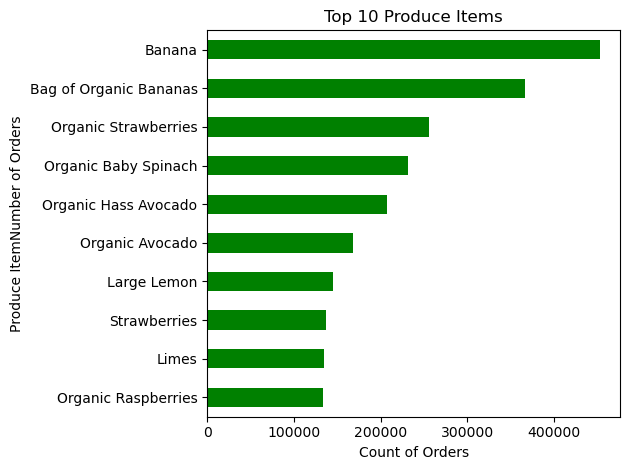

In [37]:
## Creating a visual 

bar_top_produce = top_produce_items.sort_values().plot(kind='barh', color='green')

plt.title('Top 10 Produce Items')
plt.xlabel('Count of Orders')
plt.ylabel('Produce Item''Number of Orders')
plt.tight_layout()

In [38]:
## Exporting bar chart. 

bar_top_produce.figure.savefig(os.path.join(path, 'Visualizations', 'bar_top_produce.png'), bbox_inches='tight')

In [39]:
## Grouping customers into age groups 


df_2.loc[df_2['age'] <= 33, 'age_category'] = 'Young adult'


df_2.loc[(df_2['age'] > 33) & ( df_2 ['age'] < 65), 'age_category'] = 'Middle-aged adult'


df_2.loc[df_2['age'] >= 65, 'age_category'] = 'Senior'

C:\Users\rbaue\AppData\Local\Temp\ipykernel_10780\2018877067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age'] <= 33, 'age_category'] = 'Young adult'


In [40]:
## Checking the results 

df_2['age_category'].value_counts(dropna = False)

age_category
Middle-aged adult    15011555
Senior                8195544
Young adult           7757465
Name: count, dtype: int64

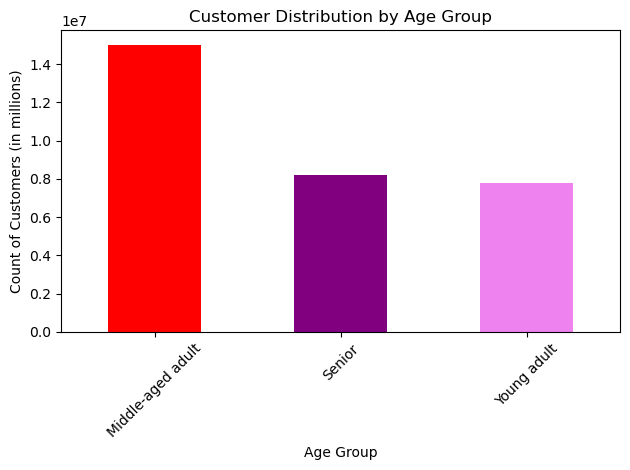

In [41]:
## Making a bar chart

bar_cust_age = df_2['age_category'].value_counts().plot(kind = 'bar', color = ['red', 'purple', 'violet'])

plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count of Customers (in millions)')
plt.tight_layout()

In [42]:
## Exporting the bar chart

bar_cust_age.figure.savefig(os.path.join(path, 'Visualizations', 'bar_cust_age.png'), bbox_inches='tight')

In [43]:
## Looking at the expenditures of these groups 

df_2.groupby('age_category').agg({'prices': ['min', 'max', 'mean']})

prices                    
                     min      max       mean
age_category                                
Middle-aged adult    1.0  99999.0  11.977104
Senior               1.0  99999.0  11.757768
Young adult          1.0  99999.0  12.034861

In [44]:
## And their order frequencies 

df_2.groupby('age_category').agg({'med_dspo': ['min', 'max', 'mean']})

med_dspo                
                       min   max      mean
age_category                              
Middle-aged adult      0.0  30.0  9.961348
Senior                 0.0  30.0  9.933025
Young adult            0.0  30.0  9.974473

In [45]:
## Looking for average number of orders for each group

avg_order_age = df_2.groupby('age_category')['order_number'].mean()
avg_order_age

age_category
Middle-aged adult    17.904057
Senior               17.784952
Young adult          17.750814
Name: order_number, dtype: float64

In [46]:
## Checking by day of the week as well

crosstab_age_dow = pd.crosstab(df_2['orders_day_of_week'], df_2['age_category'], dropna = False)

# Saving crosstab to clipboard. 
crosstab_age_dow.to_clipboard()

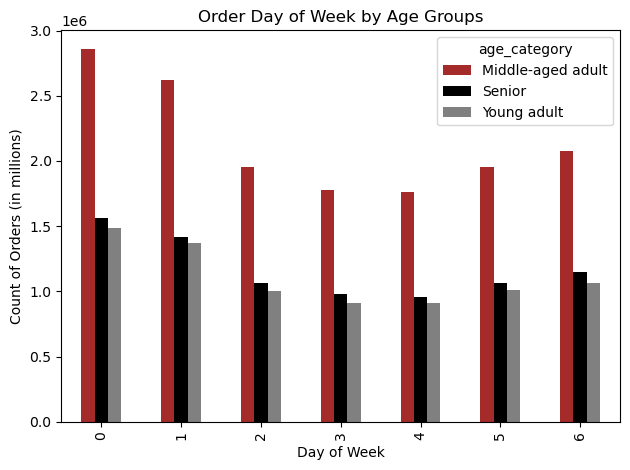

In [47]:
## Visualizing the crosstab 

bar_age_orders_dow = crosstab_age_dow.plot(kind = 'bar', color = ['brown', 'black', 'grey'])
                                                

# Title 
plt.title ('Order Day of Week by Age Groups')
plt.xlabel ('Day of Week')
plt.ylabel ('Count of Orders (in millions)')

# Layout
plt.tight_layout()

In [48]:
## Exporting bar chart 

bar_age_orders_dow.figure.savefig(os.path.join(path, 'Visualizations', 'age_order_dow.png'),bbox_inches='tight')

In [49]:
## Creating smaller dataframe for computer-usage reasons

np.random.seed(4)
dev = np.random.rand(len(df_2)) <= 0.7

# Store 70% of the sample in the dataframe 'df_big'.

df_big = df_2[dev]

# Store 30% of the sample in the dataframe 'df_small'.

df_small = df_2[~dev]

In [50]:
# Full dataframe
len(df_2)

30964564

In [51]:
# Sum of smaller dataframes
len(df_big) + len(df_small)

30964564

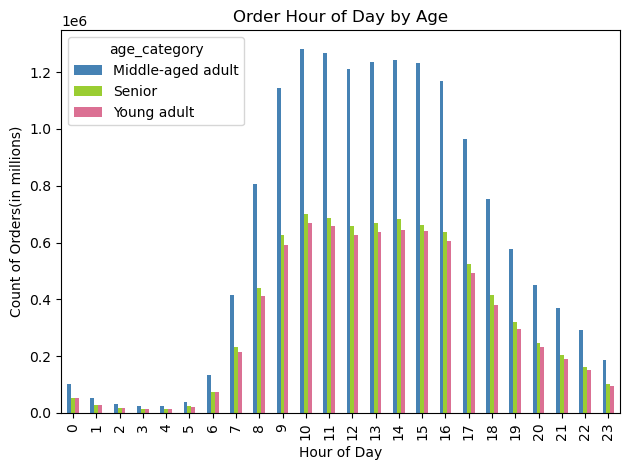

In [52]:
## Visualizing age groups by order hour of day 

crosstab_order_hour_age = pd.crosstab(df_2['order_hour_of_day'], df_2['age_category'])


bar_age_order_hour = crosstab_order_hour_age.plot(kind = 'bar', color = ['steelblue', 'yellowgreen', 'palevioletred'])

plt.title('Order Hour of Day by Age')
plt.ylabel('Count of Orders(in millions)')
plt.xlabel('Hour of Day')
                                
plt.tight_layout()


In [53]:
## Exporting line graph

bar_age_order_hour.figure.savefig(os.path.join(path, 'Visualizations', 'bar_age_order_hour.png'),bbox_inches='tight')

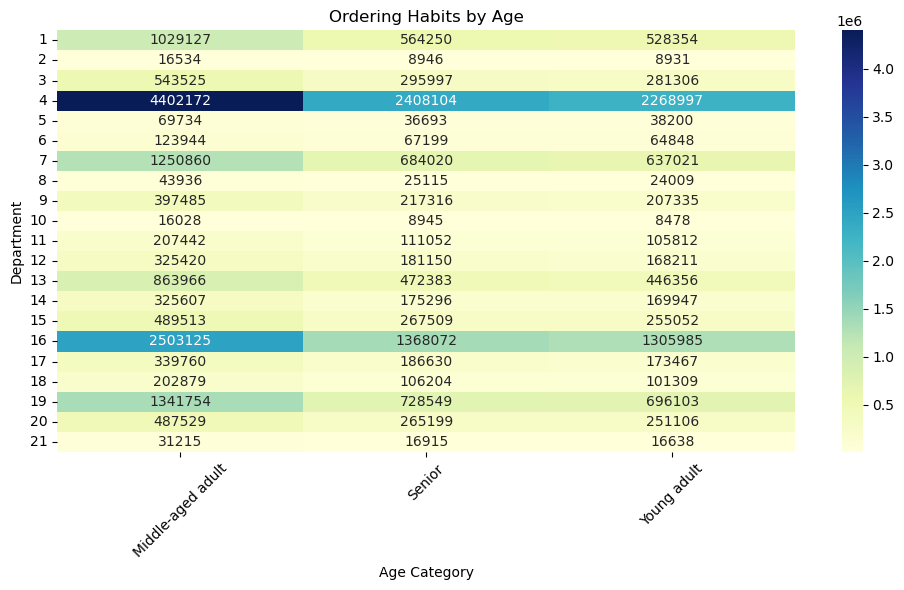

In [54]:
## Visualizing orders by age group

crosstab_age_department = pd.crosstab(df_2['department_id'], df_2['age_category'])

plt.figure(figsize=(10, 6)) 
sns.heatmap(crosstab_age_department, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Ordering Habits by Age')
plt.ylabel('Department')
plt.xlabel('Age Category')

plt.xticks(rotation=45)
plt.yticks(rotation=0)                                      
plt.tight_layout()

In [55]:
## Exporting graph

plt.savefig(os.path.join(path, 'Visualizations', 'heatmap_age_dept.png'), bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

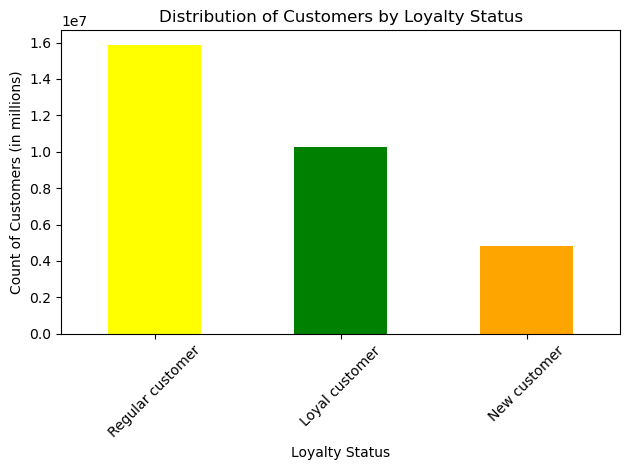

In [56]:
## Grouping by loyalty status 

bar_loyalty_status = df_2['loyalty_flag'].value_counts(dropna = False).plot.bar(color = ['yellow', 'green', 'orange'])

plt.title('Distribution of Customers by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Customers (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

In [57]:
## Exporting chart

bar_loyalty_status.figure.savefig(os.path.join(path, 'Visualizations', 'bar_loyalty_dist.png'),bbox_inches='tight')

In [58]:
## Orders by loyalty status 

df_2.groupby('loyalty_flag').agg({'order_number' : ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.641196   1  99
New customer         4.268295   1  10
Regular customer    12.347452   1  40

In [59]:
## Finding the mean to use for visual

mean_order_loyalty = df_2.groupby('loyalty_flag')['order_number'].mean()
mean_order_loyalty

loyalty_flag
Loyal customer      32.641196
New customer         4.268295
Regular customer    12.347452
Name: order_number, dtype: float64

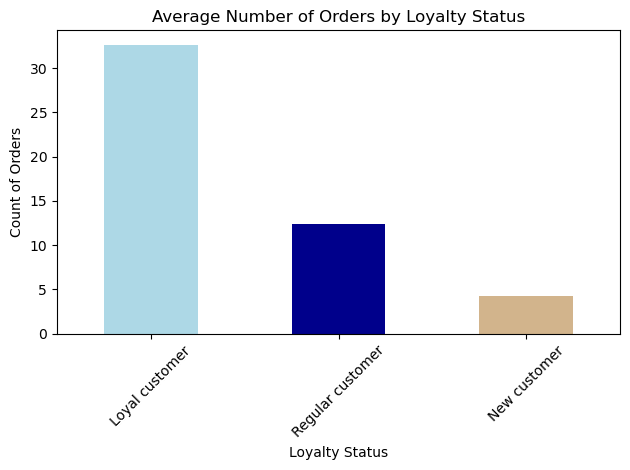

In [60]:
## Visualizing 

mean_order_loyalty_sorted = mean_order_loyalty.sort_values(ascending=False)

 
bar_avg_order_loyalty = mean_order_loyalty_sorted.plot.bar(color=['lightblue', 'darkblue', 'tan'])

plt.title('Average Number of Orders by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

In [61]:
## Exporting bar chart

bar_avg_order_loyalty.figure.savefig(os.path.join(path, 'Visualizations', 'bar_loyalty_avg_order.png'),bbox_inches='tight')

In [62]:
## Looking for median days between order

df_2.groupby('loyalty_flag').agg({'med_dspo': ['min', 'max', 'mean']})

med_dspo                 
                      min   max       mean
loyalty_flag                              
Loyal customer        0.0  14.0   5.170559
New customer          0.0  30.0  18.037059
Regular customer      0.0  30.0  10.612951

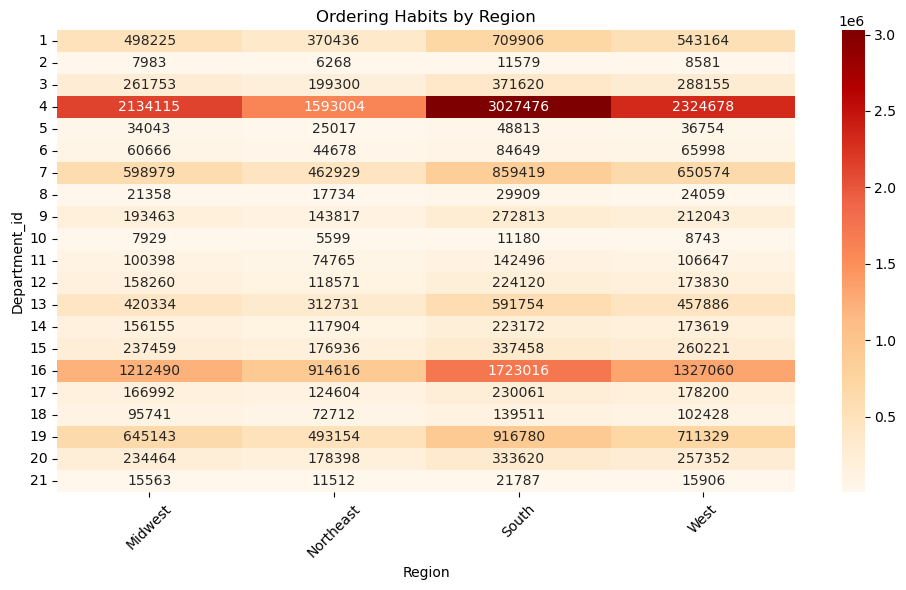

In [63]:
## Visualizing 


crosstab_region_dept = pd.crosstab(df_2['department_id'], df_2['region'])


plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_dept, annot=True, fmt='d', cmap='OrRd')
plt.title('Ordering Habits by Region')
plt.xlabel('Region')
plt.ylabel('Department_id')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()

In [64]:
## Exporting graph

plt.savefig(os.path.join(path, 'Visualizations', 'heatmap_region_orders.png'), bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

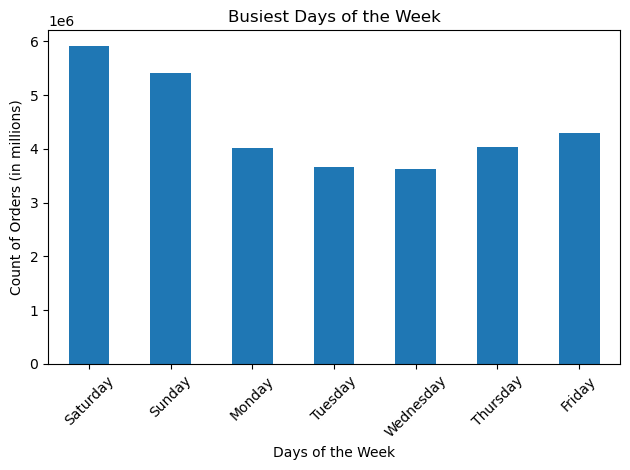

In [65]:
## Looking at busiest days of the week

bar_orders_dow = df_2['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Busiest Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Count of Orders (in millions)')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)        
plt.tight_layout()

In [66]:
# Exporting chart

bar_orders_dow.figure.savefig(os.path.join(path, 'Visualizations', 'bar_busiest_days.png'),bbox_inches='tight')

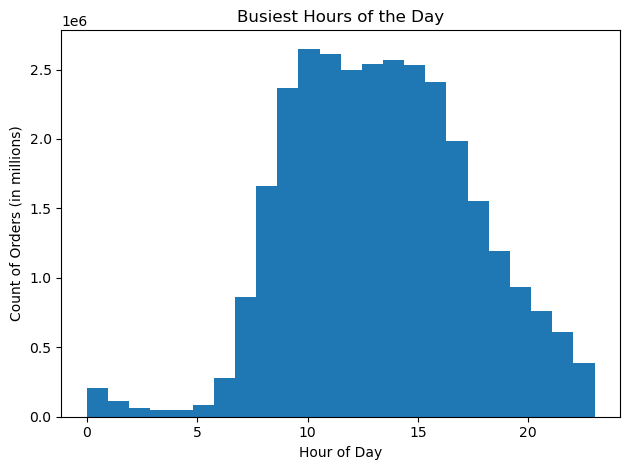

In [67]:
## Looking at busiest hours of the day

hist_busiest_hours = df_2['order_hour_of_day'].plot.hist(bins = 24)


plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders (in millions)')
     
plt.tight_layout()

In [68]:
## Exporting chart

hist_busiest_hours.figure.savefig(os.path.join(path, 'Visualizations', 'hist_busiest_hours.png'),bbox_inches='tight')

In [69]:
## Creating a subset with only orders by hour of day and prices to same RAM

df_price_sample =  df_small[['order_hour_of_day', 'prices']]
df_price_sample.head()

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
5,7,5.8
8,20,5.8
12,13,5.8


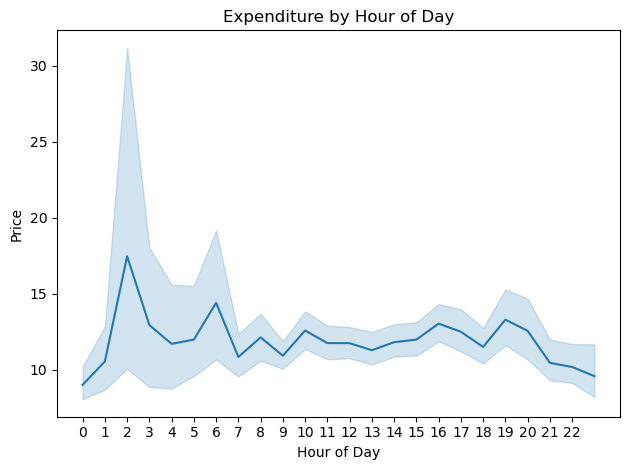

In [70]:
## Using that for a line chart


line_price_hours = sns.lineplot(data = df_price_sample, x = 'order_hour_of_day', y = 'prices')

plt.title('Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 23))  #each hour 
plt.ylabel('Price')

plt.tight_layout()

In [71]:
# Exporting the line chart

line_price_hours.figure.savefig(os.path.join(path, 'Visualizations', 'line_price_hours.png'),bbox_inches='tight')

In [72]:
## Creating a subset to use below

df_price_dow_small =  df_small[['orders_day_of_week', 'prices']]
df_price_dow_small.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
5,1,5.8
8,1,5.8
12,4,5.8


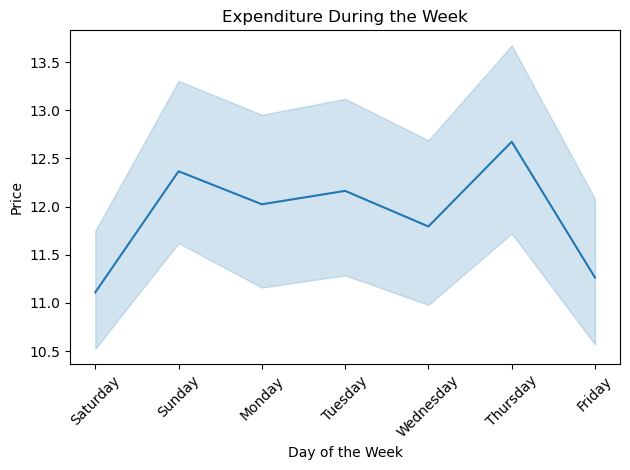

In [73]:
## Creating one for day of the week as well

line_price_dow = sns.lineplot(data = df_price_dow_small, x = 'orders_day_of_week', y = 'prices')

plt.title('Expenditure During the Week')
plt.xlabel('Day of the Week')
plt.xticks(ticks=range(7), labels=['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45) 
plt.ylabel('Price')

plt.tight_layout()

In [74]:
## Exporting it

line_price_dow.figure.savefig(os.path.join(path, 'Visualizations', 'line_price_dow.png'),bbox_inches='tight')

In [75]:
# 10. Exporting final data set

df_2.to_pickle(os.path.join(path, 'Prepared Data', 'data_final_analysis.pkl'))

In [76]:
# Making supplemental charts for use in Excel

In [84]:
## Making a pie chart of the price ranges

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

df_2['price_range'] = df_2.apply(price_label, axis=1)  

MemoryError: Unable to allocate 8.07 GiB for an array with shape (35, 30964564) and data type object

In [82]:
pie_4 = df_2['price_range'].value_counts().plot.pie(autopct=('%1.f%%'), title='Price Range Distribution')
plt.ylabel('')

KeyError: 'price_range'